In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("insurance.csv")

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
df_cleaned = df.dropna()

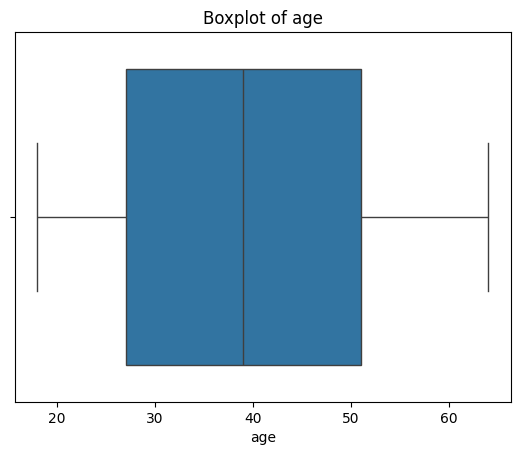

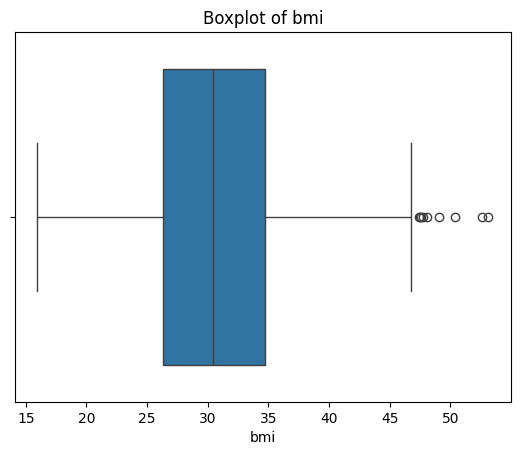

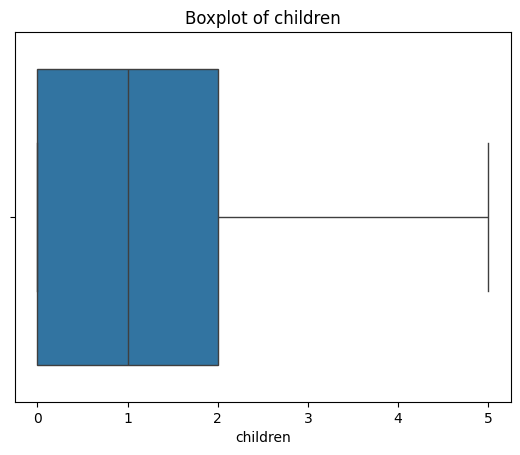

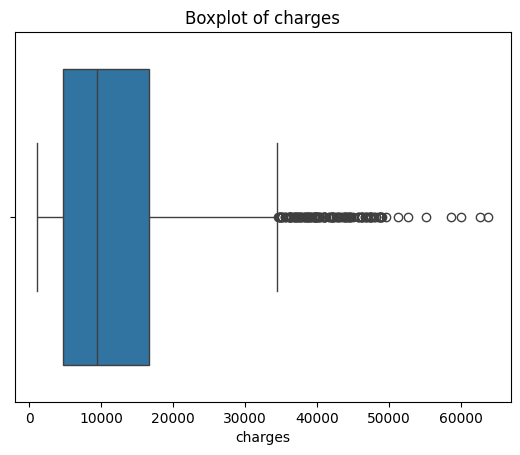

In [46]:
#Using Box plots

numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in numerical_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

In [47]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

In [48]:
scaler = MinMaxScaler()
numerical_cols_scaled = ['age', 'bmi', 'children', 'charges']
df_cleaned[numerical_cols_scaled] = scaler.fit_transform(df_cleaned[numerical_cols_scaled])


In [49]:
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print(f"  Training MSE: {mean_squared_error(y_train, y_train_pred_lr)}")
print(f"  Testing MSE: {mean_squared_error(y_test, y_test_pred_lr)}")

Linear Regression:
  Training MSE: 0.018658537166180763
  Testing MSE: 0.01805424946902038


In [51]:
# Polynomial Regression
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    plr = LinearRegression()
    plr.fit(X_train_poly, y_train)
    y_train_pred_plr = plr.predict(X_train_poly)
    y_test_pred_plr = plr.predict(X_test_poly)
    print(f"Polynomial Regression (degree={degree}):")
    print(f"  Training MSE: {mean_squared_error(y_train, y_train_pred_plr)}")
    print(f"  Testing MSE: {mean_squared_error(y_test, y_test_pred_plr)}")


Polynomial Regression (degree=1):
  Training MSE: 0.018658537166180766
  Testing MSE: 0.018054249469020383
Polynomial Regression (degree=2):
  Training MSE: 0.01686813400618538
  Testing MSE: 0.016260229988982914
Polynomial Regression (degree=3):
  Training MSE: 0.01537429832946857
  Testing MSE: 0.017925746016800564
Polynomial Regression (degree=4):
  Training MSE: 0.013202535005541978
  Testing MSE: 0.04135257002002609
Polynomial Regression (degree=5):
  Training MSE: 0.010563188106180515
  Testing MSE: 4.424835448592495


In [52]:
# Random Forest
rf = RandomForestRegressor(max_depth=10, max_features='sqrt', criterion='squared_error', random_state=42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(f"  Training MSE: {mean_squared_error(y_train, y_train_pred_rf)}")
print(f"  Testing MSE: {mean_squared_error(y_test, y_test_pred_rf)}")


Random Forest:
  Training MSE: 0.005705675111731479
  Testing MSE: 0.018404013742310387
